# ECE 176 Assignment 4: Classification using Neural Network

Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [20]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from utils.data_processing import get_cifar10_data
from utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [21]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [22]:
# Import more utilies and the layers you have implemented
from layers.sequential import Sequential
from layers.linear import Linear
from layers.relu import ReLU
from layers.softmax import Softmax
from layers.loss_func import CrossEntropyLoss
from utils.optimizer import SGD
from utils.dataset import DataLoader
from utils.trainer import Trainer


## Visualize some examples from the dataset.

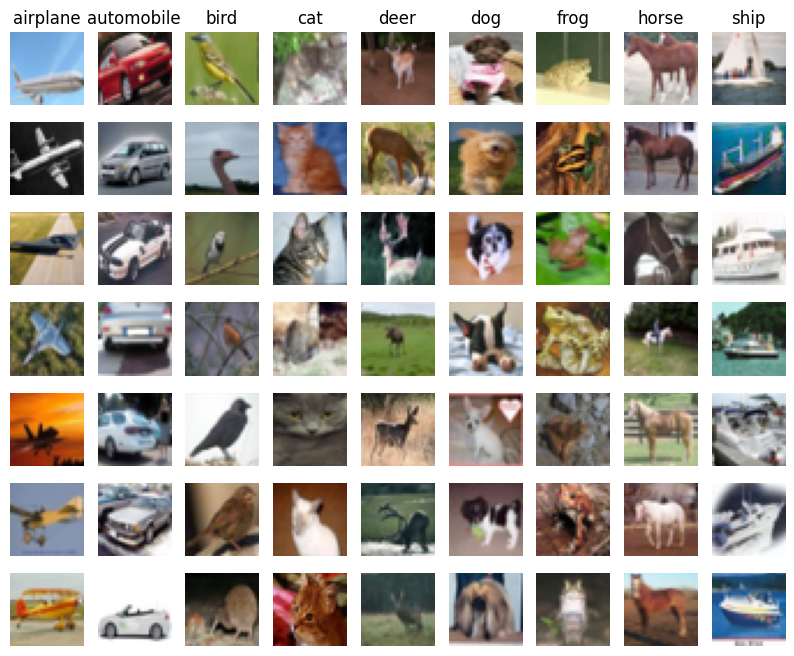

In [23]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [24]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [25]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


In [26]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [27]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302540
Validate Acc: 0.084
Epoch Average Loss: 2.302360
Epoch Average Loss: 2.302157
Epoch Average Loss: 2.301862
Validate Acc: 0.088
Epoch Average Loss: 2.301446
Epoch Average Loss: 2.300836
Epoch Average Loss: 2.299979
Validate Acc: 0.100
Epoch Average Loss: 2.298829
Epoch Average Loss: 2.297331
Epoch Average Loss: 2.295499
Validate Acc: 0.076
Epoch Average Loss: 2.293400
Epoch Average Loss: 2.290883
Epoch Average Loss: 2.287796
Validate Acc: 0.084
Epoch Average Loss: 2.283895
Epoch Average Loss: 2.278854
Epoch Average Loss: 2.272623
Validate Acc: 0.096
Epoch Average Loss: 2.265645
Epoch Average Loss: 2.258323
Epoch Average Loss: 2.250578
Validate Acc: 0.096
Epoch Average Loss: 2.242889
Epoch Average Loss: 2.235484
Epoch Average Loss: 2.228397
Validate Acc: 0.116
Epoch Average Loss: 2.222001
Epoch Average Loss: 2.215636
Epoch Average Loss: 2.210050
Validate Acc: 0.124
Epoch Average Loss: 2.204788
Epoch Average Loss: 2.199843
Epoch Average Loss: 2.195201
Validate

### Print the training and validation accuracies for the default hyper-parameters provided

In [28]:
from utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.3402
Validation acc:  0.3


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around 0.2~0.3 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

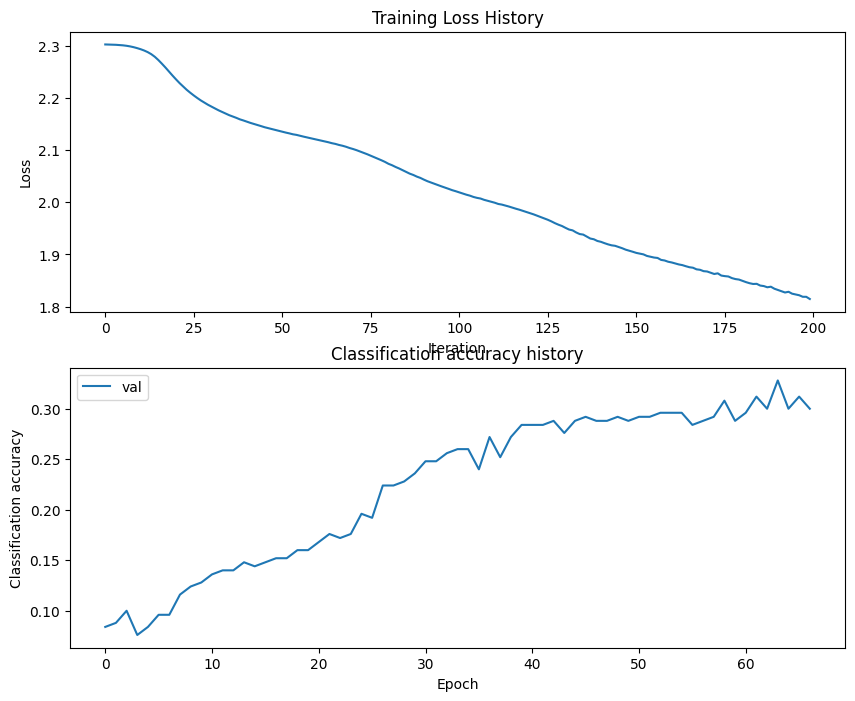

In [29]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


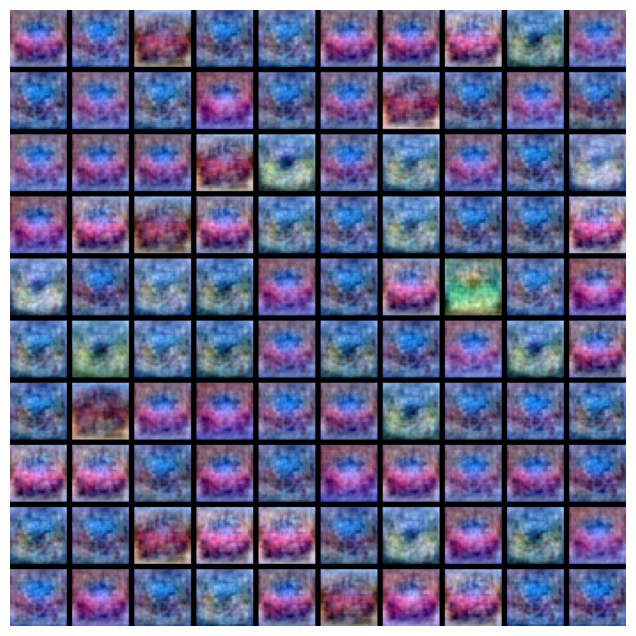

In [30]:
from utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

#### Explain your hyperparameter tuning process below.

#### Your Answer:

To reduce the bulk appearing on the notebook, I reduced it to the best hyperparameters I was able to find. However, for my initial testing, I set some values for hidden size, learning rate, number of epochs, and weight decay that were significantly lower, somewhat lower, somewhat higher, and significantly higher than the default values given above in the notebook. These were:
- Hidden Size: 10, 50, 150, 200, 300
- Learning Rate: 0.001, 0.009, 0.01, 0.1, 0.2
- Epochs: 150, 200, 250, 300, 400
- Weight Decay: 0.001, 0.009, 0.01, 0.1, 0.2

I did this by created nested for loops iterating through lists of each value to experiment with different combinations of these values as shown in the code below. From here, I messed around manually with some modifications to these values as well to determine the best output I could identify. I figured by having a range of values to benchmark around, it would make it easier to then manually adjust these in minor increments to solve this.
```{python}
learn_rates = [0.001, 0.009, 0.01, 0.02, 0.1, 0.2]
w_decays =[ 0.001, 0.009, 0.01, 0.1, 0.21]
epoch [ =150, 200, 250, 300, 400100050]
h_siz= [es 10, 50, 150, 200, 150]
best_acc = 0

for lr in learn_rates:
    for decay in w_decays:
        for ep in epoch:
            for size in h_sizes:
                net = init_model()
                optim = SGD(net, lr=lr, weight_decay=decay)
                trainer = Trainer(dataset, optim, net, loss_func, ep, batch_size, validate_interval=3)
                train_error, validation_accuracy = trainer.train()
                out_val = net.predict(x_val)
                acc = get_classification_accuracy(out_val, y_val)
                
                if acc > best_acc:
                    best_acc = acc
                    best_net_hyperparams = [lr, decay, ep, size]
                
```

In [17]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #

best_net_hyperparams = [0.1, 0.001, 1500, 200]

hidden_size = best_net_hyperparams[3]

dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=best_net_hyperparams[0], weight_decay=best_net_hyperparams[1])
loss_func = CrossEntropyLoss()
epoch = best_net_hyperparams[2]  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)

trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)

train_error, validation_accuracy = trainer.train()

# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################

#pass


Epoch Average Loss: 2.300406
Validate Acc: 0.104
Epoch Average Loss: 2.271975
Epoch Average Loss: 2.214721
Epoch Average Loss: 2.187562
Validate Acc: 0.128
Epoch Average Loss: 2.161612
Epoch Average Loss: 2.155029
Epoch Average Loss: 2.136390
Validate Acc: 0.164
Epoch Average Loss: 2.099480
Epoch Average Loss: 2.083220
Epoch Average Loss: 2.062446
Validate Acc: 0.208
Epoch Average Loss: 2.047646
Epoch Average Loss: 2.027279
Epoch Average Loss: 2.030457
Validate Acc: 0.256
Epoch Average Loss: 1.995481
Epoch Average Loss: 1.992701
Epoch Average Loss: 1.985179
Validate Acc: 0.260
Epoch Average Loss: 1.961555
Epoch Average Loss: 1.936788
Epoch Average Loss: 1.902417
Validate Acc: 0.320
Epoch Average Loss: 1.917423
Epoch Average Loss: 1.888360
Epoch Average Loss: 1.894159
Validate Acc: 0.336
Epoch Average Loss: 1.876140
Epoch Average Loss: 1.837034
Epoch Average Loss: 1.825410
Validate Acc: 0.308
Epoch Average Loss: 1.828711
Epoch Average Loss: 1.808396
Epoch Average Loss: 1.822818
Validate

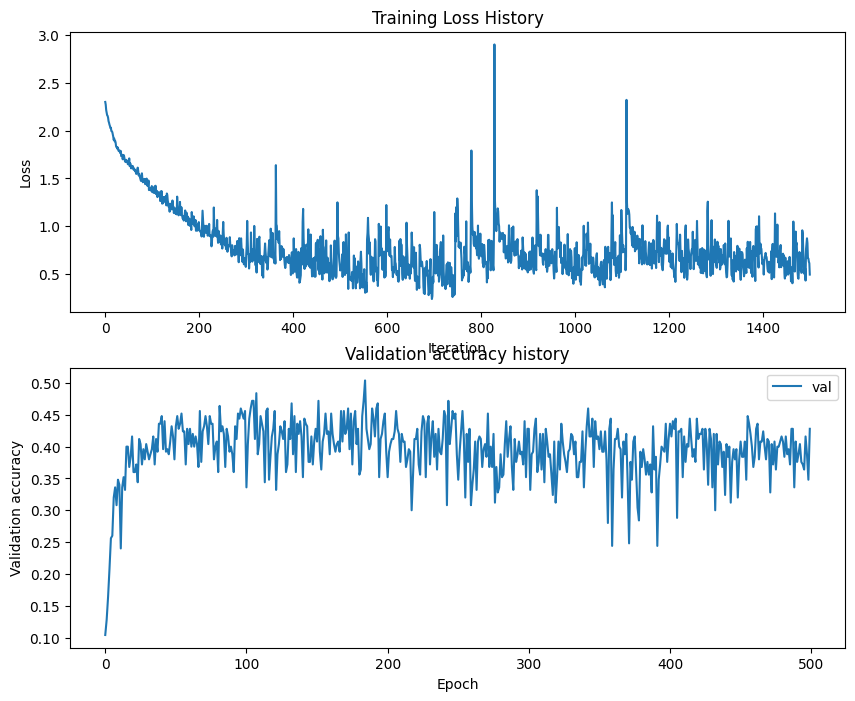

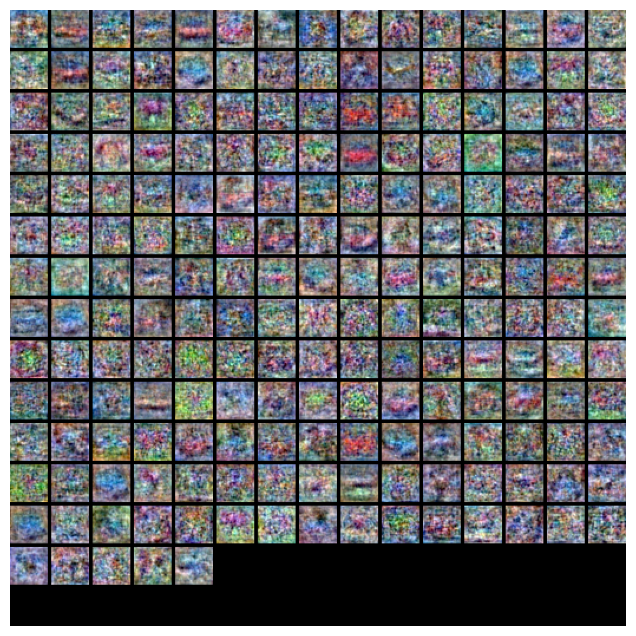

In [18]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
plt.plot(validation_accuracy, label="val")
plt.title("Validation accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Validation accuracy")
plt.legend()
plt.show()

# TODO: visualize the weights of the best network (5%)
show_net_weights(net)

# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [19]:
test_acc = (net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)
train_acc = (net.predict(x_train) == y_train).mean()
print("Training acc: ", train_acc)
val_acc = (net.predict(x_val) == y_val).mean()
print("Validation acc: ", val_acc)

Test accuracy:  0.402
Training acc:  0.8562
Validation acc:  0.404


#### Inline Question (9%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

#### Your Answer:
1: Train on a larger dataset. AND
3: Increase the regularization strength.

#### Your Explanation:

This giant gap between testing and training accuracy with training accuracy being about two times higher is a likely sign of the model overfitting the data. Thus, training on a larger dataset could help decrease this gap by countering this overfitting through the introduction of greater diversity in variations/samples to better generalize the model. Increasing the regularization strength could also help resolve overfitting by reducing the effect of noise (or outliers) for the training set and improve distribution of weights for the features to improve the model's output.

## Survey (1%)

### Question:

How many hours did you spend on this assignment?

### Your Answer:

I spent around 12-15 hours on this assignment (mostly waiting on code to run before figuring out how to set up CUDA).